In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import pandas as pd
import matplotlib.ticker
import matplotlib.lines as lines
import seaborn as sns

plt.style.use(
    [
        "science",
        "ieee",
        #               'nature',
        "grid",
        #                'notebook',
    ]
)

In [2]:
colors = sns.color_palette(palette="Set1")
colors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [3]:
df = pd.read_pickle("../data/pre-trained_model_metrics.pkl")
df

,models,dataset,metric,epoch_normalised,value
0,Inception,Train,accuracy,0.056042,0.726009
1,Inception,Train,accuracy,0.484815,0.728385
2,Inception,Train,accuracy,1.188946,0.731551
3,Inception,Train,accuracy,1.703515,0.734173
4,Inception,Train,accuracy,2.271353,0.736142
...,...,...,...,...,...
833,Xception,Validation,loss,26.770255,0.898266
834,Xception,Validation,loss,27.869034,0.922543
835,Xception,Validation,loss,28.368479,0.939884
836,Xception,Validation,loss,29.300777,0.960694


### The following is one way to plot everything (each grouped value is an individual plot)

In [4]:
# df.groupby(["models", "dataset", "metric"]).plot(x="epoch_normalised", y="value")

### The following manually combine the plots

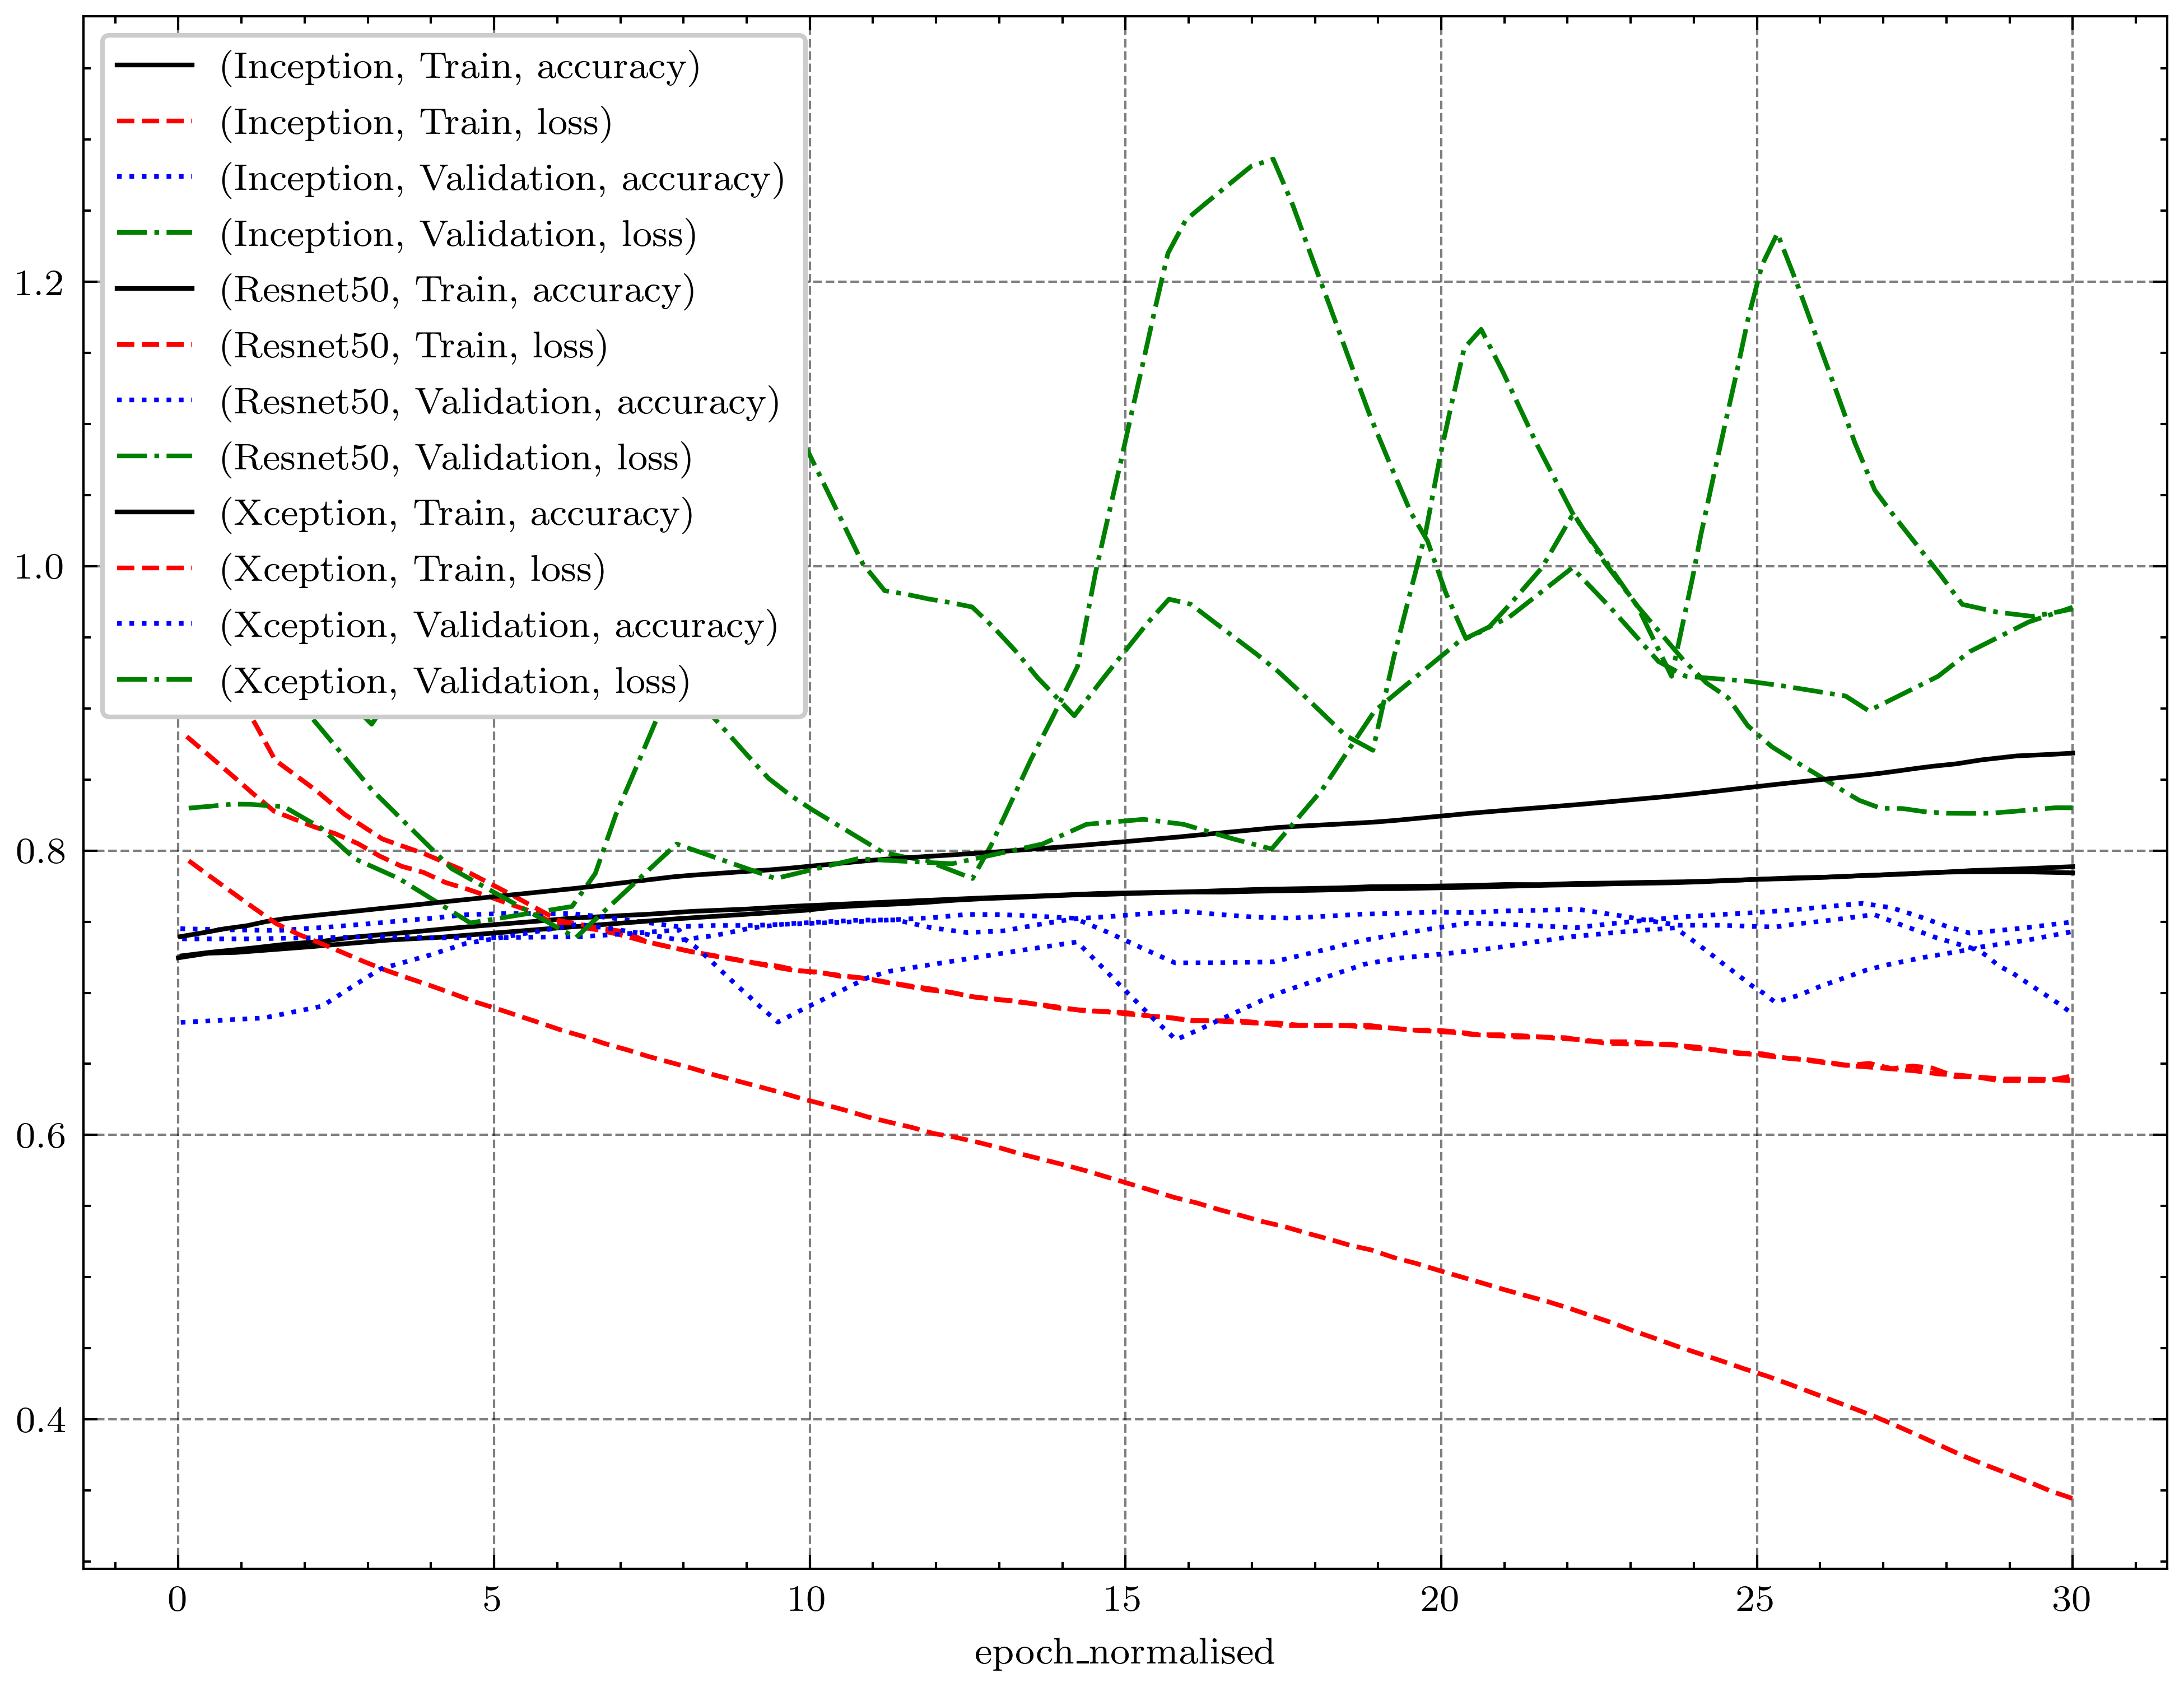

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

for label, _df in df.groupby(["models", "dataset", "metric"]):
    _df.plot(x="epoch_normalised", y="value", ax=ax, label=label)
plt.legend()

### The following creates a pretty plot :)

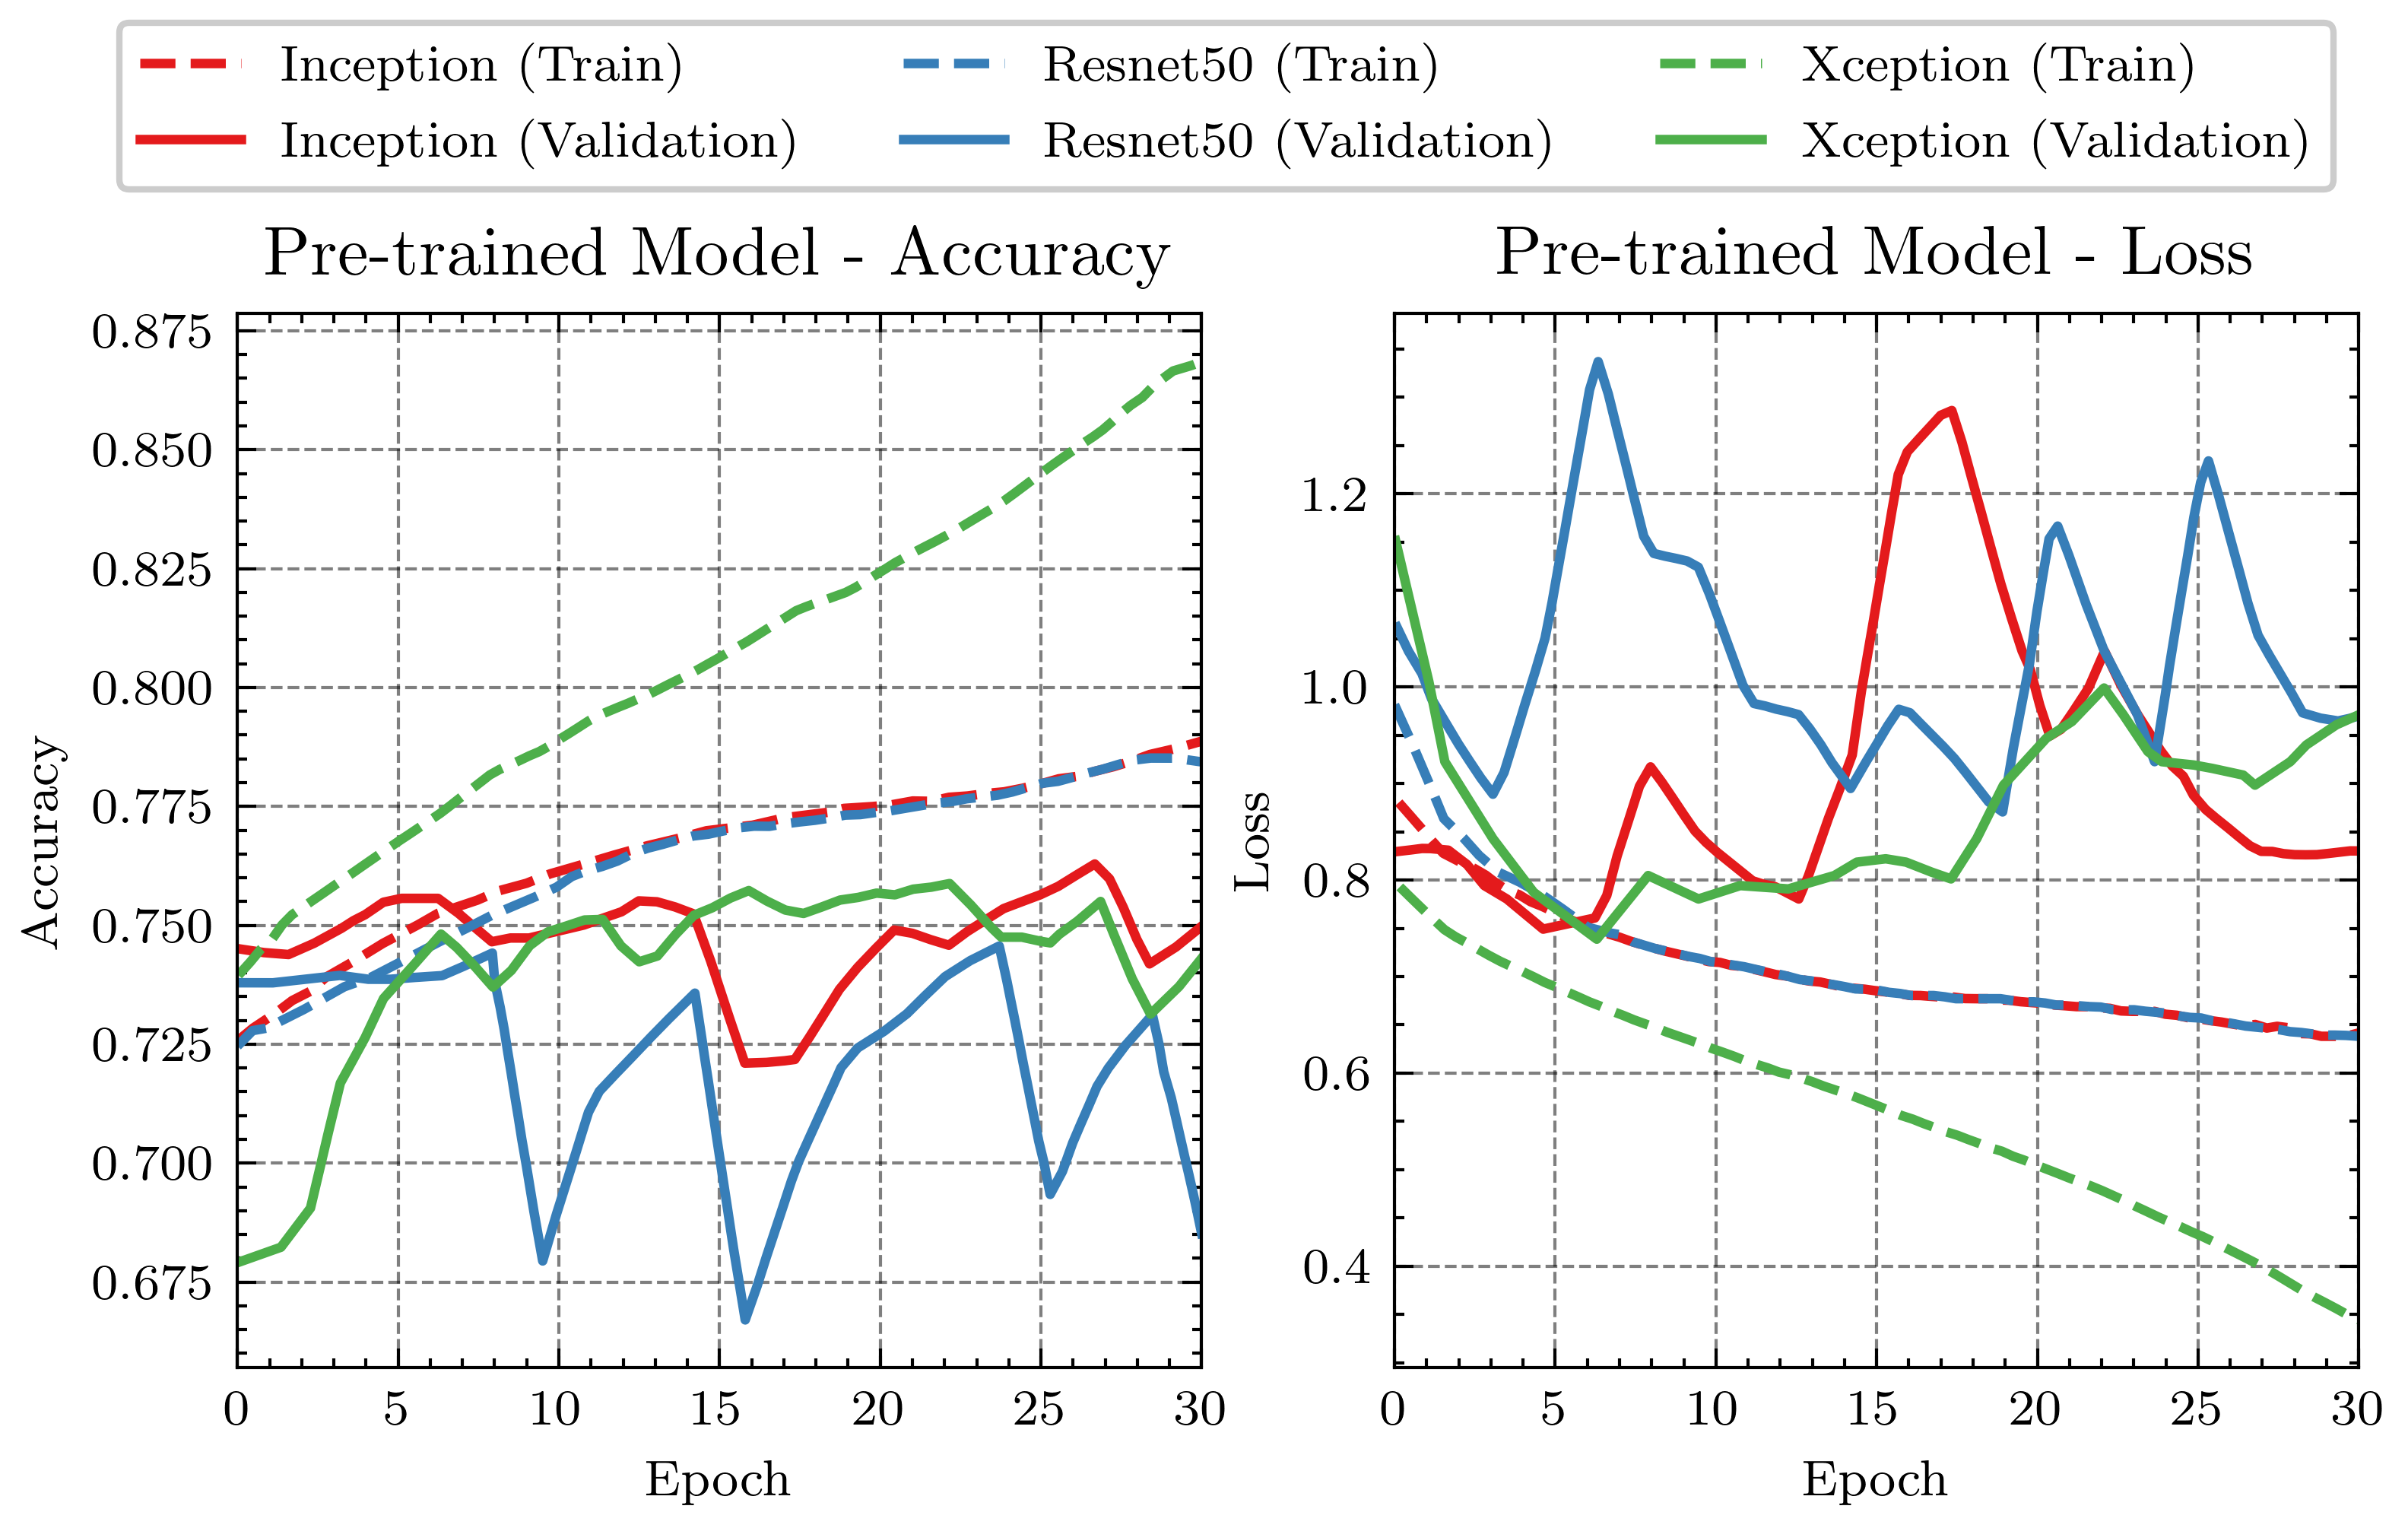

In [6]:
main_fs = 11
sub_fs = 8
linewidth = 1.5


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))


color_mapping = {
    model_type: color for model_type, color in zip(df.models.unique(), colors)
}
linestyle_mapping = {
    data_type: linestyle
    for data_type, linestyle in zip(df.dataset.unique(), ["dashed", "solid"])
}
ax_mapping = {metric: _ax for metric, _ax in zip(df.metric.unique(), [ax1, ax2])}

for label, _df in df.groupby(["models", "dataset", "metric"]):
    _ax = ax_mapping[label[2]]
    _ax.plot(
        _df["epoch_normalised"],
        _df["value"],
        label=f"{label[0]} ({label[1]})",
        linewidth=linewidth,
        linestyle=linestyle_mapping[label[1]],
        c=color_mapping[label[0]],
    )


plot_name = "Pre-trained Model"

ax1.set_title(f"{plot_name} - Accuracy", fontsize=main_fs)
ax2.set_title(f"{plot_name} - Loss", fontsize=main_fs)


ax1.set_xlim(0, 30)
ax2.set_xlim(0, 30)

ax1.set_xlabel("Epoch", fontsize=sub_fs)
ax2.set_xlabel("Epoch", fontsize=sub_fs)
ax1.set_ylabel("Accuracy", fontsize=sub_fs)
ax2.set_ylabel("Loss", fontsize=sub_fs)


plt.legend(
    bbox_to_anchor=(1.0, 1.3),
    fancybox=True,
    #     shadow=True,
    ncol=3,
)
plt.show()